# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


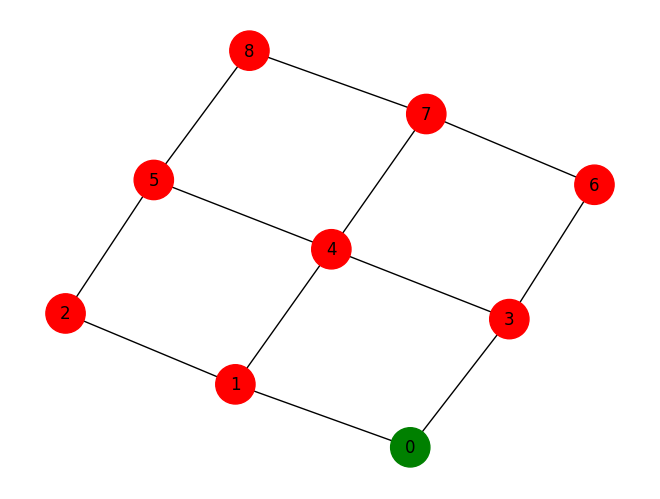

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=20) 
rede.application_layer.run_app("AC_BQC", alice_id=1, bob_id=0, num_qubits=num_qubits)

     ┌───┐                                             ┌───┐
q_0: ┤ Z ├──────X───────X───────────────────────■──────┤ X ├
     └───┘┌───┐ │ ┌───┐ │            ┌───┐┌───┐ │ ┌───┐└─┬─┘
q_1: ──■──┤ Y ├─┼─┤ T ├─┼────────────┤ X ├┤ Y ├─■─┤ H ├──┼──
       │  └───┘ │ ├───┤ │ ┌───┐      └─┬─┘├───┤   └───┘  │  
q_2: ──┼────■───┼─┤ S ├─X─┤ T ├─X──X───┼──┤ Y ├──────────┼──
       │    │   │ ├───┤   └───┘ │  │   │  └───┘          │  
q_3: ──■────┼───X─┤ X ├─■───────X──┼───■────X────────────┼──
          ┌─┴─┐   └───┘ │          │        │            │  
q_4: ─────┤ X ├─────────■──────────X────────X────────────■──
          └───┘                                             


C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-10-31 11:37:50,753: Circuito aleatório gerado com 5 qubits e 20 portas.
2024-10-31 11:37:50,753: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-10-31 11:37:50,754: Instrução: {'operation': 'z', 'qubits': [0]}
2024-10-31 11:37:50,754: Instrução: {'operation': 'y', 'qubits': [1]}
2024-10-31 11:37:50,755: Instrução: {'operation': 'swap', 'qubits': [0, 3]}
2024-10-31 11:37:50,755: Instrução: {'operation': 'x', 'qubits': [3]}
2024-10-31 11:37:50,756: Instrução: {'operation': 'cx', 'qubits': [2, 4]}
2024-10-31 11:37:50,757: Instrução: {'operation': 's', 'qubits': [2]}
2024-10-31 11:37:50,757: Instruç

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=1, bob_id=0, num_qubits=num_qubits, num_rounds=5)

2024-10-31 11:37:51,015: Circuito aleatório gerado com 5 qubits e 30 portas.


                                                                              »
q_0: ──────X───────■───────────────────────────────────X──X───────────────────»
           │       │      ┌───┐                        │  │                   »
q_1: ──────┼───────┼───X──┤ S ├───────────X────────X───┼──X───────────────────»
     ┌───┐ │ ┌───┐ │   │  ├───┤┌───┐      │        │   │                      »
q_2: ┤ S ├─┼─┤ X ├─┼───X──┤ Y ├┤ Z ├──────┼───■────X───┼──X───────────────────»
     └───┘ │ └─┬─┘ │      └───┘└───┘┌───┐ │   │  ┌───┐ │  │                   »
q_3: ──────┼───■───┼───■────■────■──┤ X ├─┼───■──┤ Z ├─┼──┼───────X────────■──»
           │       │ ┌─┴─┐  │    │  └─┬─┘ │ ┌───┐└───┘ │  │ ┌───┐ │ ┌───┐┌─┴─┐»
q_4: ──────X───────■─┤ X ├──■────■────■───X─┤ Y ├──────X──X─┤ Y ├─X─┤ Z ├┤ X ├»
                     └───┘                  └───┘           └───┘   └───┘└───┘»
«                    
«q_0: ────────────X──
«                 │  
«q_1: ───────X────X──
«            │  ┌───┐
«q_2: ──■─

2024-10-31 11:37:51,015: Instrução: {'operation': 's', 'qubits': [2]}
2024-10-31 11:37:51,015: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-10-31 11:37:51,015: Instrução: {'operation': 'swap', 'qubits': [0, 4]}
2024-10-31 11:37:51,015: Instrução: {'operation': 'cz', 'qubits': [4, 0]}
2024-10-31 11:37:51,015: Instrução: {'operation': 'cx', 'qubits': [3, 4]}
2024-10-31 11:37:51,015: Instrução: {'operation': 'swap', 'qubits': [2, 1]}
2024-10-31 11:37:51,030: Instrução: {'operation': 's', 'qubits': [1]}
2024-10-31 11:37:51,031: Instrução: {'operation': 'cz', 'qubits': [4, 3]}
2024-10-31 11:37:51,031: Instrução: {'operation': 'cz', 'qubits': [3, 4]}
2024-10-31 11:37:51,032: Instrução: {'operation': 'y', 'qubits': [2]}
2024-10-31 11:37:51,033: Instrução: {'operation': 'z', 'qubits': [2]}
2024-10-31 11:37:51,034: Instrução: {'operation': 'cx', 'qubits': [4, 3]}
2024-10-31 11:37:51,034: Instrução: {'operation': 'swap', 'qubits': [4, 1]}
2024-10-31 11:37:51,035: Instrução: {'operation'

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.5240


0.5240068406407032

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.3447
0.7024
0.6435
0.5460
0.5150
0.3117
0.6352
0.5820
0.4938
0.4657


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
rede.application_layer.print_used_eprs()

Total de pares EPR utilizados: 100


In [8]:
rede.get_total_useds_eprs()

2024-10-31 11:37:51,102: Eprs usados na camada PhysicalLayer: 0
2024-10-31 11:37:51,103: Eprs usados na camada LinkLayer: 0
2024-10-31 11:37:51,104: Eprs usados na camada NetworkLayer: 0
2024-10-31 11:37:51,104: Eprs usados na camada ApplicationLayer: 100


100

In [9]:
#taxadesucesso